# UNO

Observational study (no manipulation of variables) and observing the numbers and percentages, then get a conclusion based on these numbers.

Question:

If the first card I draw is yellow, what's the chance that the card is a +2

The number of +2's in the deck is 8 (2 per color)

The number of yellows in the deck is 25 (Sample space)

The number of cards in an Uno deck is 108

A trial in this simulation counts as 1 run to see if I draw the card, followed by a wild (I will run 10,000 trials)

The outcome I'm measuring is figuring out the probability of a yellow card being a +2

Possible bias could be that I can't get a number fully accurate to the theoretical due to only 100,000 trials being ran

In [6]:
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Theoretically I calculated a 8% chance (2/25)*100 that you draw a +2 that is yellow if the first card you draw is yellow, I ended up with an empirical chance of 8.04% after 100,000 trials which ended up drawing a yellow +2 1814 times. which is very close to the theoretical chance. 

In [7]:
import random

def build_uno_deck():
    colors = ["Red", "Yellow", "Green", "Blue"]
    numbers = [str(i) for i in range(10)]  # 0–9
    actions = ["Skip", "Reverse", "Draw Two"]
    deck = []

    # Number cards: one 0 per color, two each of 1–9
    for color in colors:
        deck.append(f"{color} 0")
        for num in range(1, 10):
            deck.extend([f"{color} {num}", f"{color} {num}"])

    # Action cards: two of each per color
    for color in colors:
        for action in actions:
            deck.extend([f"{color} {action}", f"{color} {action}"])

    # Wilds
    deck.extend(["Wild"] * 4)
    deck.extend(["Wild Draw Four"] * 4)

    return deck  # 108 cards


# Simulation
yellow_draws = 0
yellow_plus2 = 0
trials = 100000  # large number to approximate probability

for _ in range(trials):
    deck = build_uno_deck()
    random.shuffle(deck)
    first_card = deck.pop()

    if first_card.startswith("Yellow"):
        yellow_draws += 1
        if first_card == "Yellow Draw Two":
            yellow_plus2 += 1

# Probability
if yellow_draws > 0:
    probability = yellow_plus2 / yellow_draws * 100
else:
    probability = 0

print(f"Trials: {trials}")
print(f"Yellow first card draws: {yellow_draws}")
print(f"Yellow +2 occurrences: {yellow_plus2}")
print(f"Estimated Probability: {probability:.2f}%")
print(f"Theoretical Probability: {2/25*100:.2f}%")


Trials: 100000
Yellow first card draws: 23060
Yellow +2 occurrences: 1854
Estimated Probability: 8.04%
Theoretical Probability: 8.00%


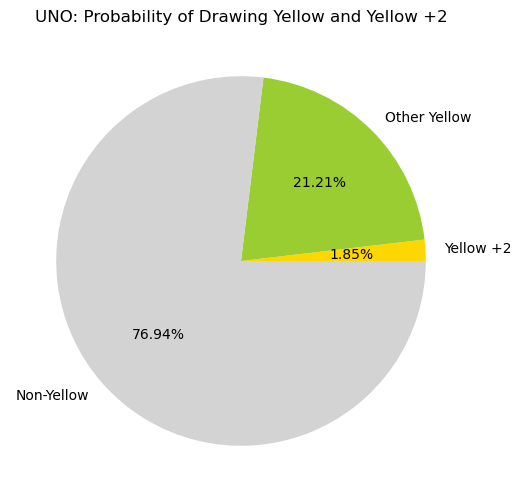

In [9]:
summary_data = pd.DataFrame({
    "Outcome": [
        "Yellow +2",
        "Other Yellow",
        "Non-Yellow"
    ],
    "Count": [
        yellow_plus2,
        yellow_draws - yellow_plus2,
        trials - yellow_draws
    ]
})

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(summary_data["Count"],
        labels=summary_data["Outcome"],
        autopct='%1.2f%%',
        colors=["gold", "yellowgreen", "lightgray"])
plt.title("UNO: Probability of Drawing Yellow and Yellow +2")
plt.show()


Answer: The odds for drawing a +2 That is yellow theoretically is a 8% chance when you are drawing and the first card is yellow. The empirical data I got, however, was a 8.04% chance. We see can see from the pie chart that the chance that we drew a Non-Yellow first was a 76.94% chance, the chance we drew a yellow that wasn't a +2 was 21.21% while actually drawing a yellow +2 randomly, is a 1.85% chance.